In [1]:
import pandas as pd

# Read the data from the file into a dataframe
df = pd.read_csv('data.txt')
#df=df.drop(["idle_time","idle_men","no_of_style_change"],axis=1)
df.isnull().sum().sum() #506 valores en blanco de wip, se reemplazarán con 0
df['wip'] = df['wip'].fillna(0)
#eliminar columna de fecha
df = df.drop('date', axis=1)
# Display the dataframe
df.shape 
df.head()


C:\Users\57313\AppData\Local\Temp\ipykernel_11952\2929918839.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,Quarter1,finishing,Thursday,1,0.75,3.94,0.0,960,0,0.0,0,0,8.0,0.886500
2,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


## Limpieza de datos

In [2]:
column_types = df.dtypes
print(column_types)

quarter                   object
department                object
day                       object
team                       int64
targeted_productivity    float64
smv                      float64
wip                      float64
over_time                  int64
incentive                  int64
idle_time                float64
idle_men                   int64
no_of_style_change         int64
no_of_workers            float64
actual_productivity      float64
dtype: object


In [3]:
df['department'] = df['department'].str.replace(' ', '')
df['department'].unique() # 2 departamentos: sweing y finishing
df['department'].value_counts() # 691 datos de sweing y 506 de finishing
df['quarter'].unique() # 5 quarters
df['day'].unique() #trabajan todos los días menos los Viernes (Friday)
df['team'].unique() # Hay 12 equipos en total (del 1 al 12)
df['targeted_productivity'].describe()[['min', 'max']] #Rango de 0 a 1, con mínimo de 0.07 y máximo de 0.8 si
df['smv'].describe() #Rango de 2.9 a 54.56 con promedio de 15.0622
df['wip'].describe() #Rango de 0 a 23122 con promedio de 687.23
df['over_time'].describe() #Rango de 0 a 25920 con promedio de 4567.46
df['incentive'].describe() #Rango de 0 a 3600 con promedio de 38.21
df['idle_time'].describe() #Rango de 0 a 3000 con promedio 0.73
df['idle_men'].describe() #Rango de 0 a 45 con promedio de 0.3692
df['no_of_style_change'].describe() #Rango de 0 a 2 con promedio de 0.1505
df['no_of_workers'].describe() #Rango de 2 a 89 con promedio de 34.609
df['actual_productivity'].describe() #Rango de 0.2337 a 1.12 con promedio de 0.735091



count    1197.000000
mean        0.735091
std         0.174488
min         0.233705
25%         0.650307
50%         0.773333
75%         0.850253
max         1.120437
Name: actual_productivity, dtype: float64

<Axes: title={'center': 'Average number of workers in each department'}, xlabel='department'>

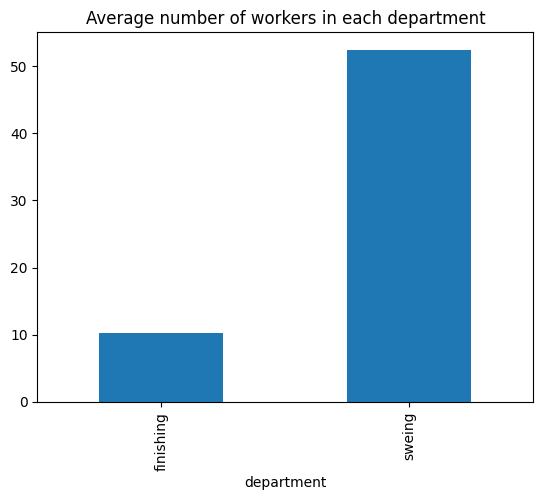

In [4]:
df.groupby('department')['no_of_workers'].mean().plot(kind='bar', title='Average number of workers in each department')

In [5]:
import pandas as pd
import pandas as pd
#df.drop('idle_men', axis=1, inplace=True)#columns=['idle_time', 'idle_men', 'no_of_style_change'])
# Check if df variable is defined
if 'df' not in locals():
    # Define df variable
    df = pd.DataFrame()

# Drop the 'idle_men' column from the dataframe
df.drop('idle_men', axis=1, inplace=True)



**Incluir Seaborn para visualización**

In [32]:
import seaborn as sns

### Histogramas por cada variable y dispersión entre variables

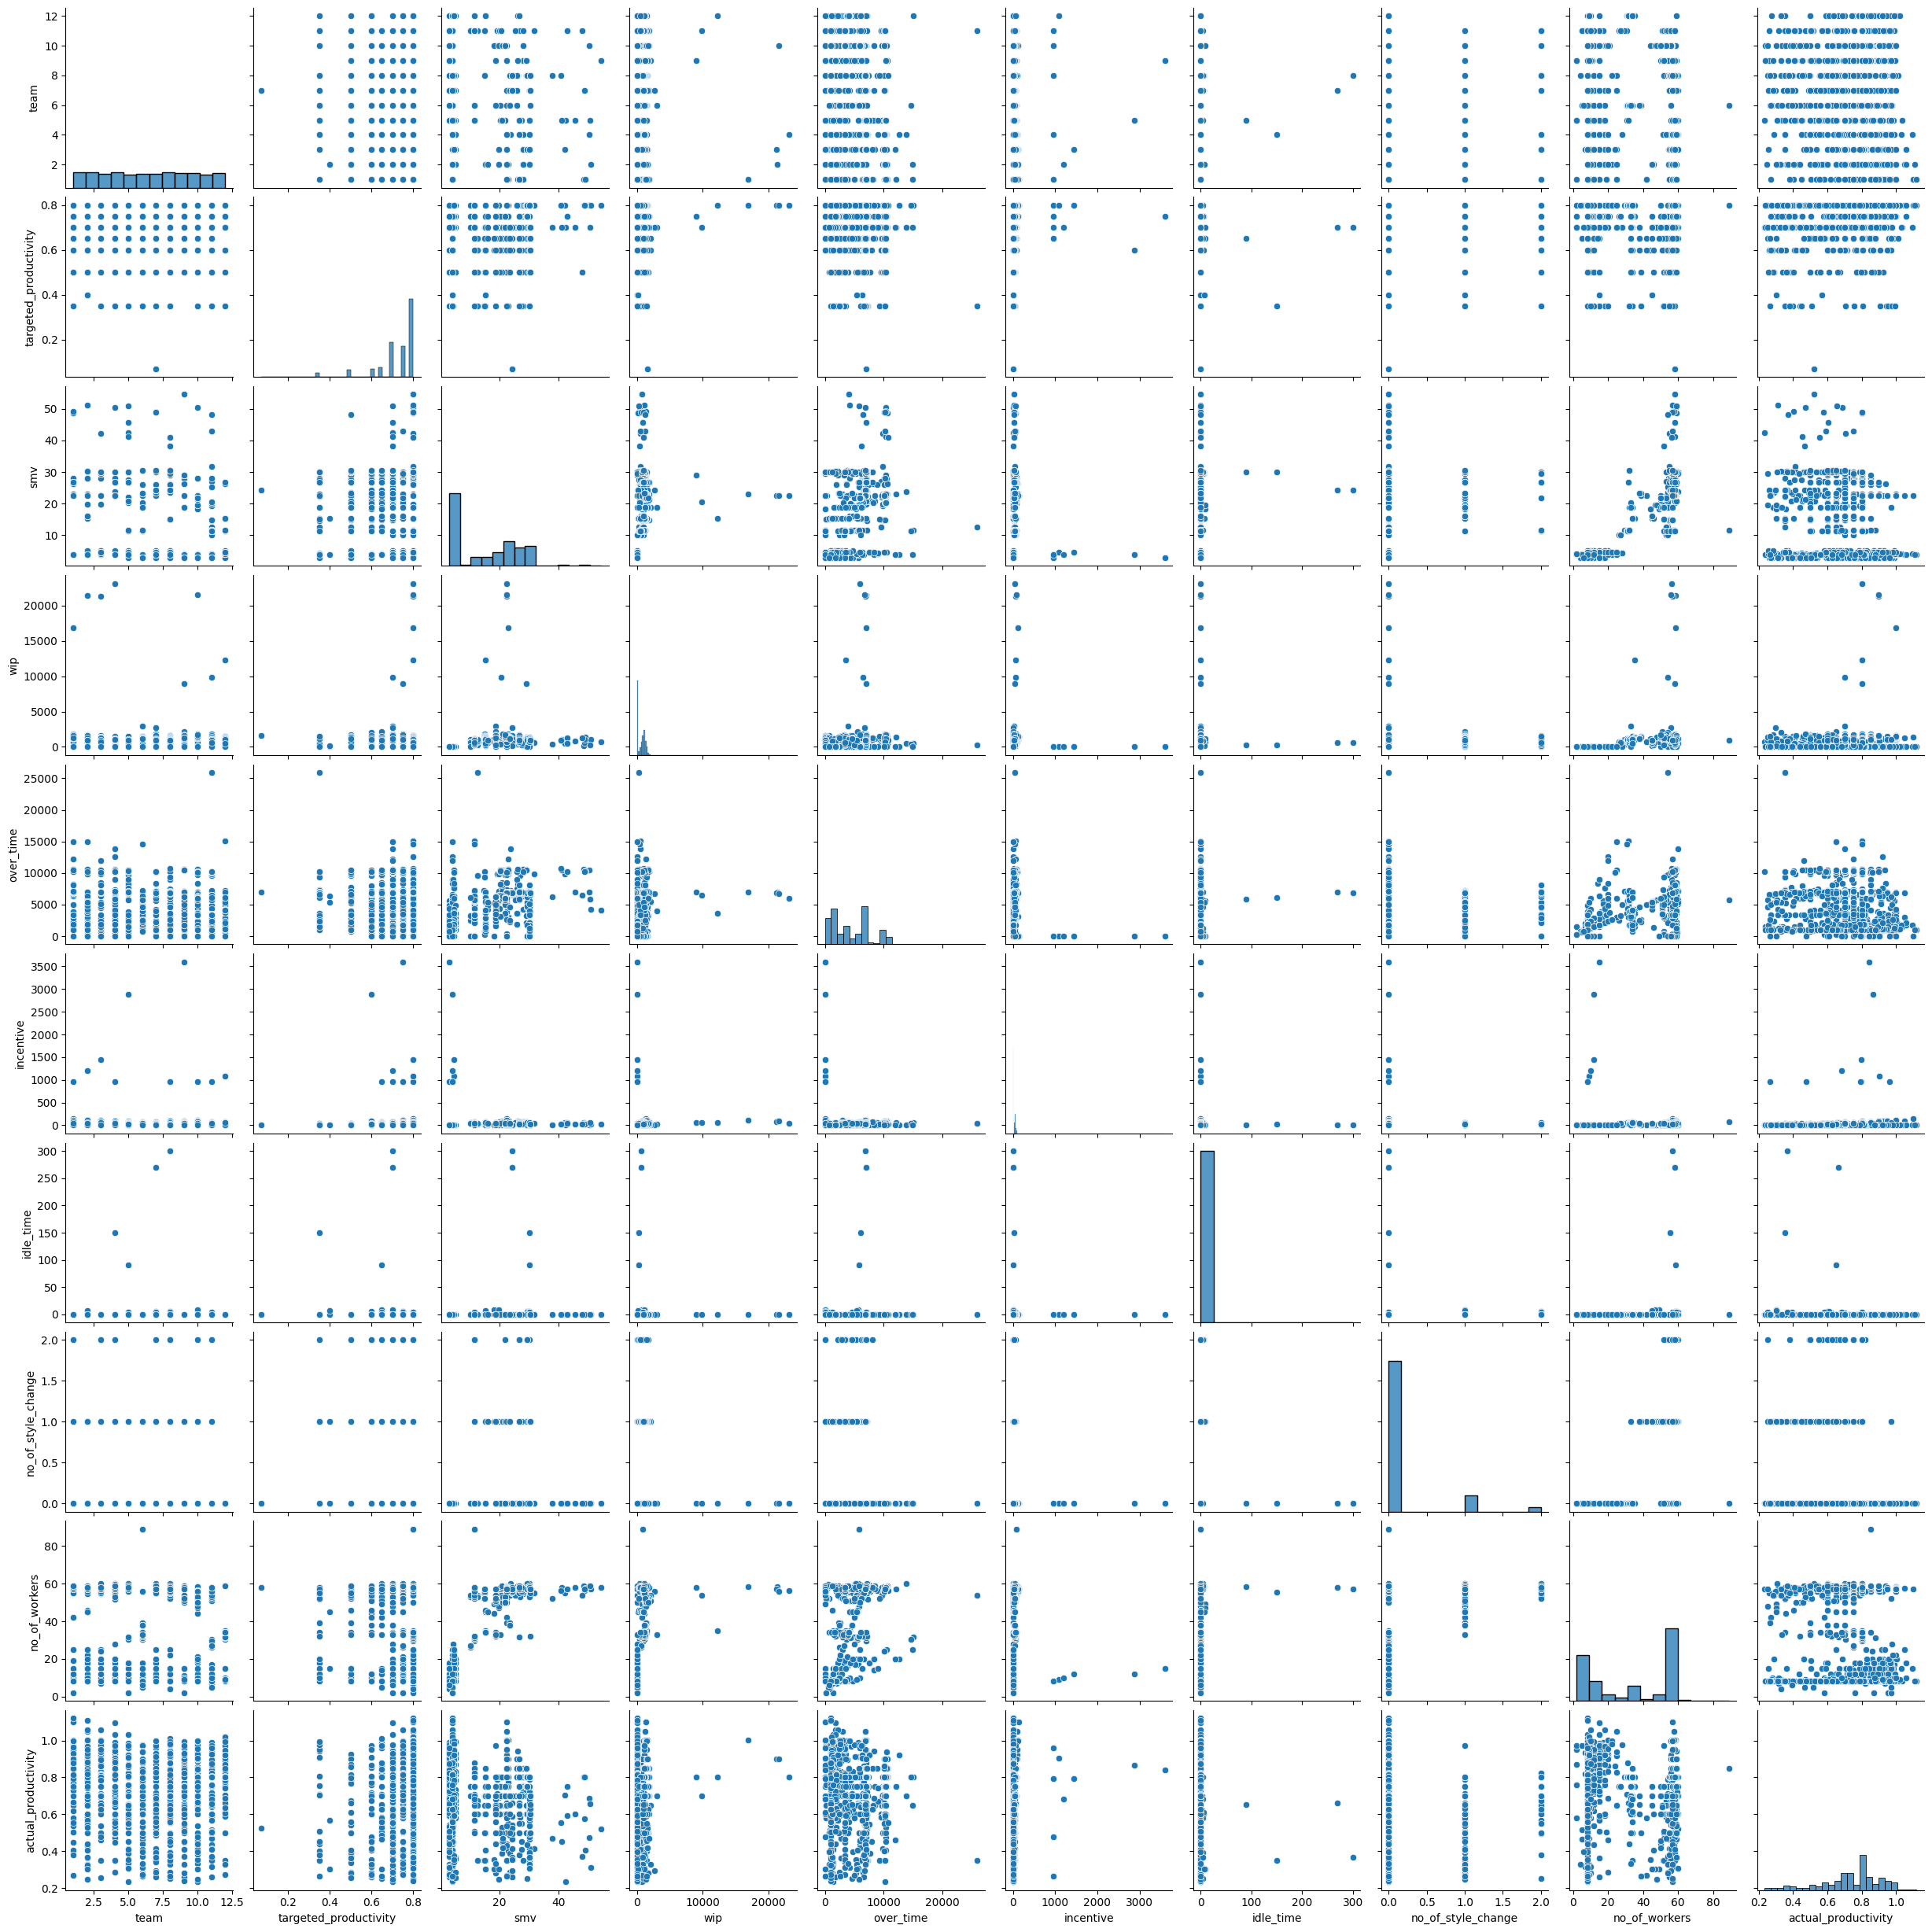

In [9]:
sns.pairplot(df,)

### Matriz de correlación

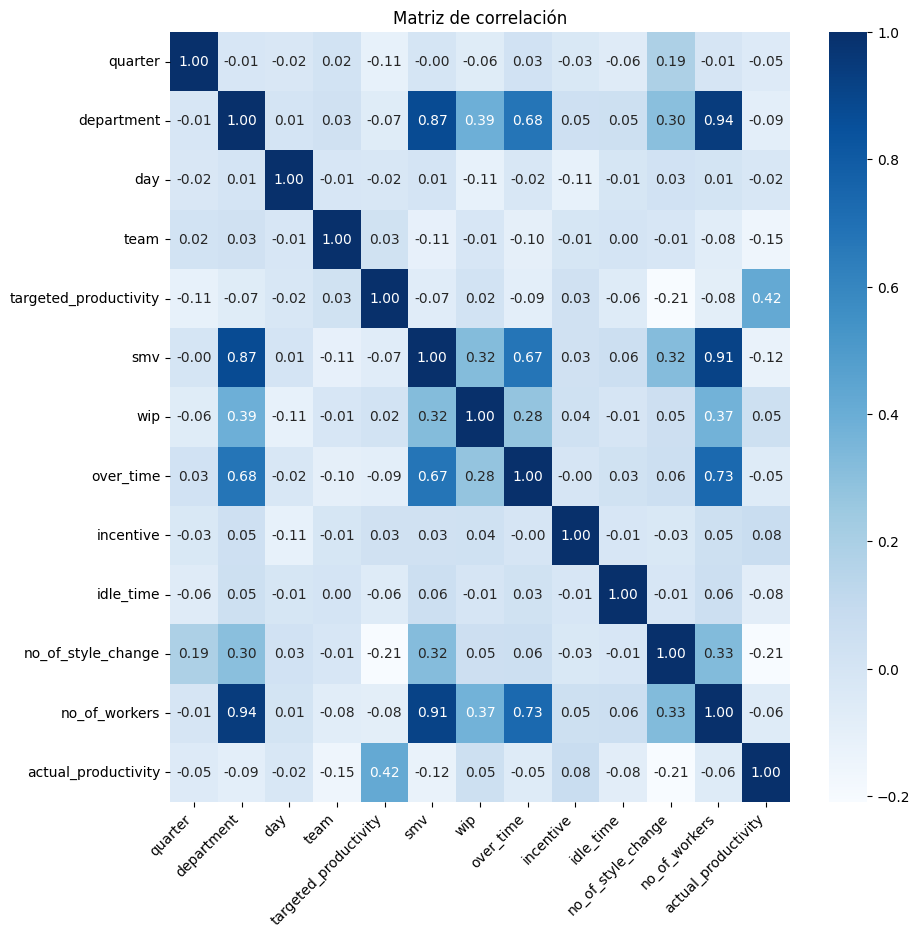

In [11]:
import matplotlib.pyplot as plt

# Convertir las columnas categóricas a numéricas
for col in df.columns:
    if df[col].dtype == 'object':
        df[col] = df[col].astype('category').cat.codes

# Ahora puedes calcular la correlación
corr = df.corr()

# Aumentar el tamaño de la figura
plt.figure(figsize=(10, 10))

# Calcular la correlación
corr = df.corr()

# Crear un mapa de calor con seaborn
sns.heatmap(corr, cmap="Blues", annot=True, fmt=".2f", annot_kws={"size": 10})

# Añadir un título
plt.title("Matriz de correlación")

# Rotar las etiquetas del eje x y ajustar su alineación
plt.xticks(rotation=45, ha='right')

# Mostrar la figura
plt.show()

### Diagramas de dispersión y tendencia entre variables de entrada y variable de respuesta

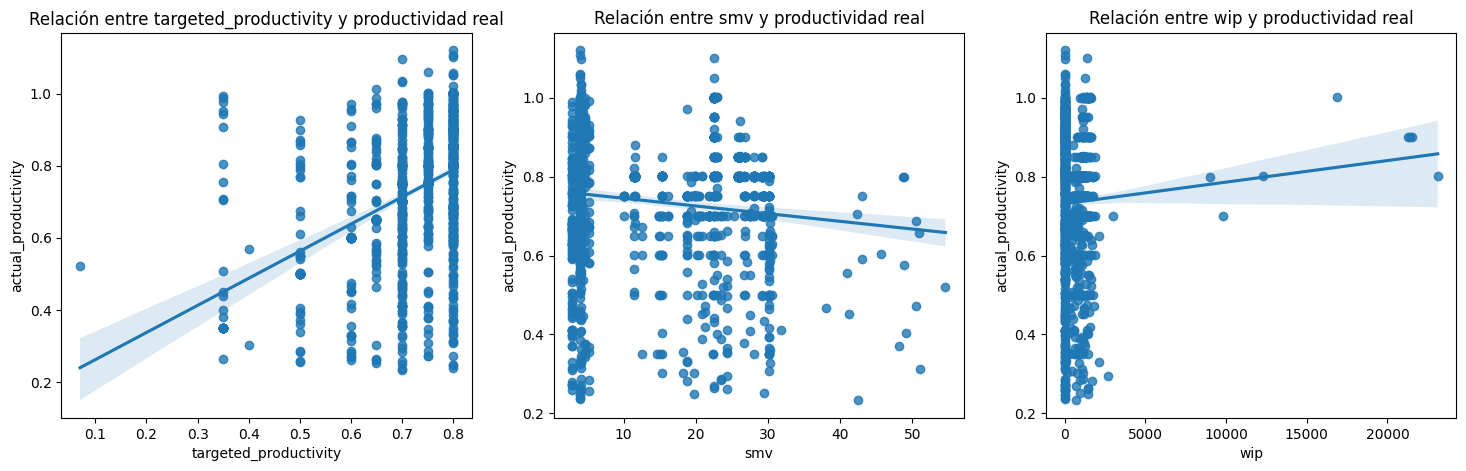

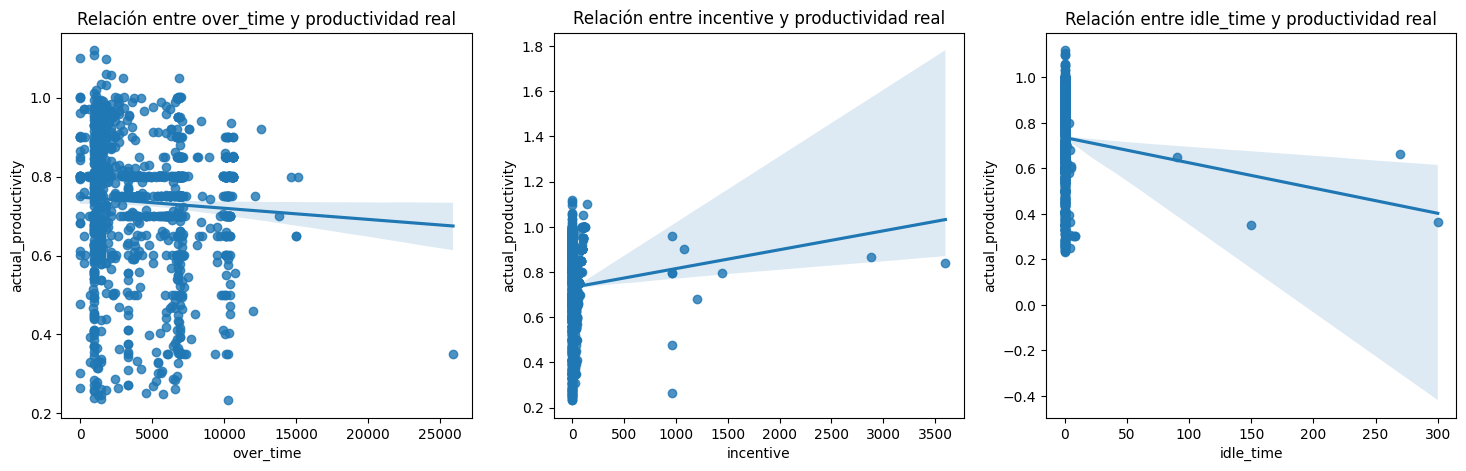

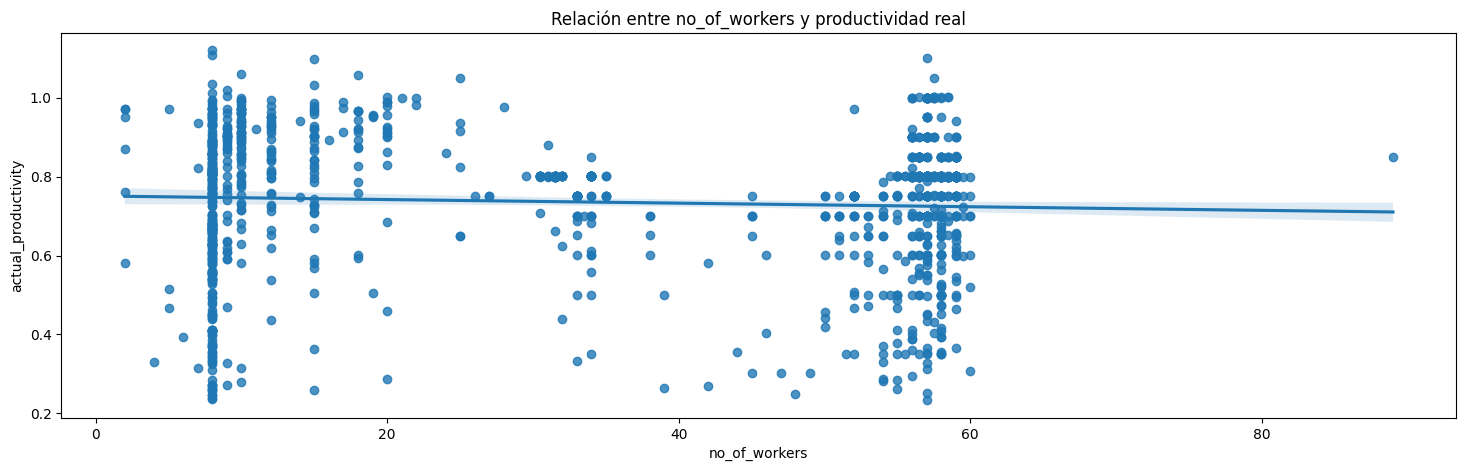

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Lista de variables
variables = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'no_of_workers']

# Dividir las variables en grupos de tres
variables_grouped = [variables[n:n+3] for n in range(0, len(variables), 3)]

# Crear una figura para cada grupo de variables
for i, group in enumerate(variables_grouped):
    plt.figure(i, figsize=(18, 5))
    for j, var in enumerate(group):
        plt.subplot(1, len(group), j+1)
        sns.regplot(x=var, y='actual_productivity', data=df)
        plt.title(f'Relación entre {var} y productividad real')

plt.show()

#### Eliminar datos atipicos

In [18]:
#eliminar datos atípicos de todas las variables de df
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df))
df = df[(z < 3).all(axis=1)]
#verificar que se eliminaron los datos atípicos
df.shape


(948, 13)

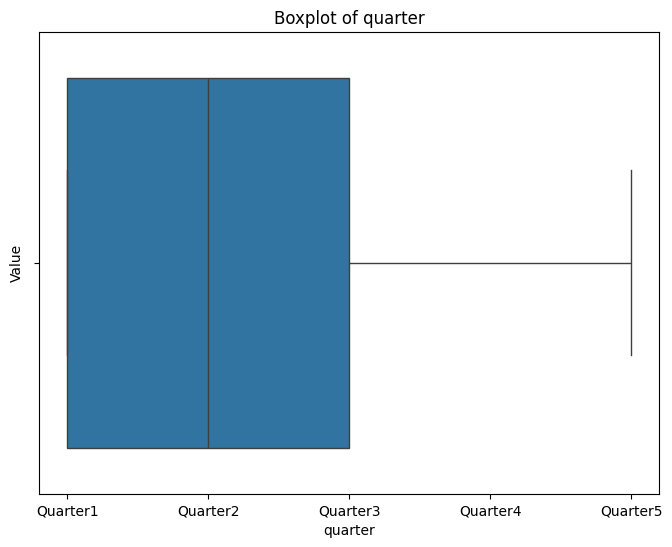

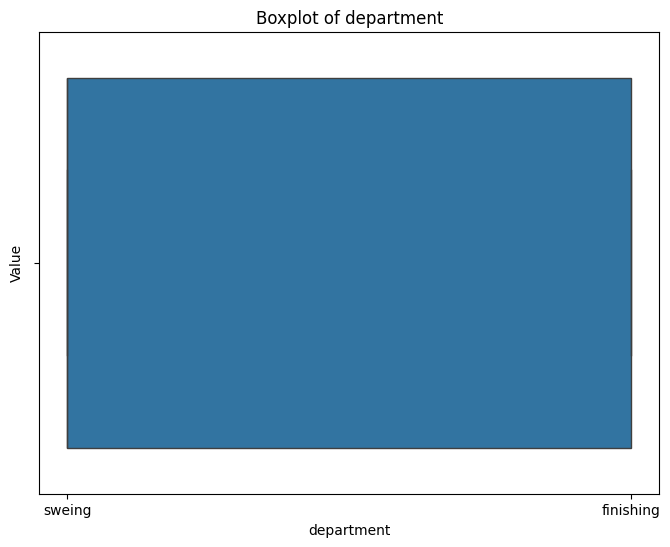

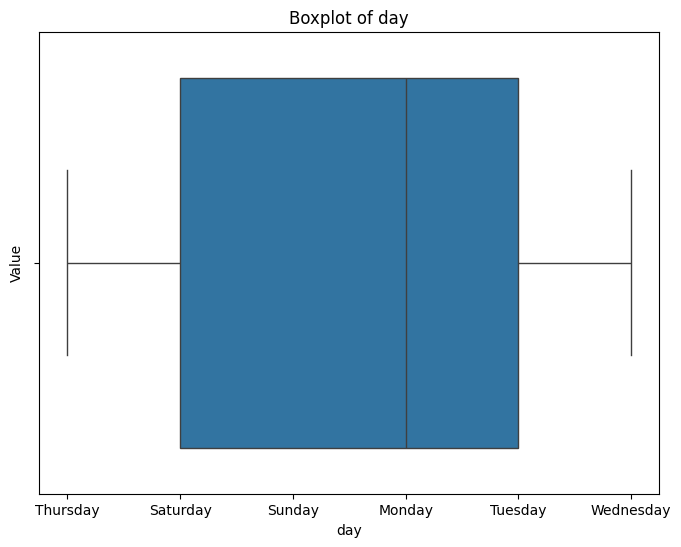

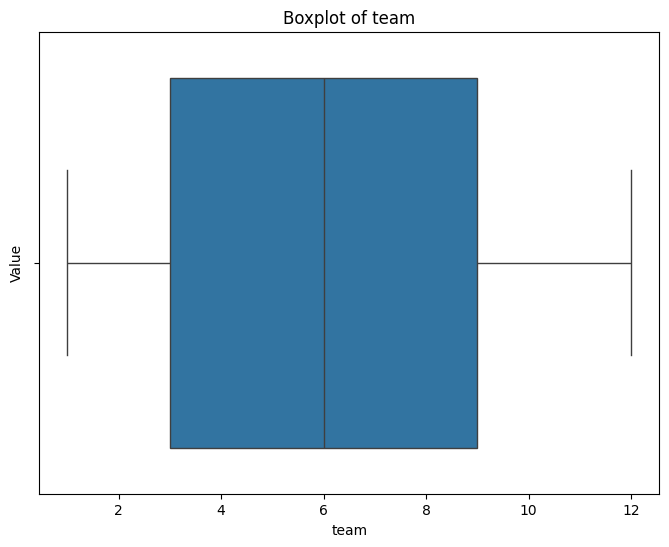

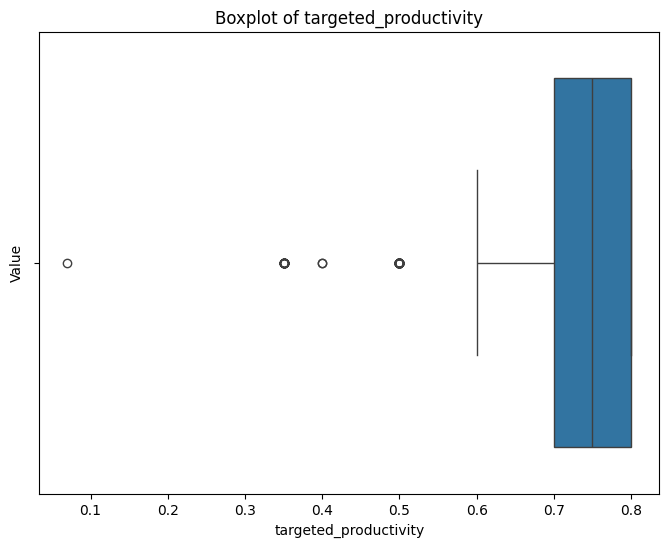

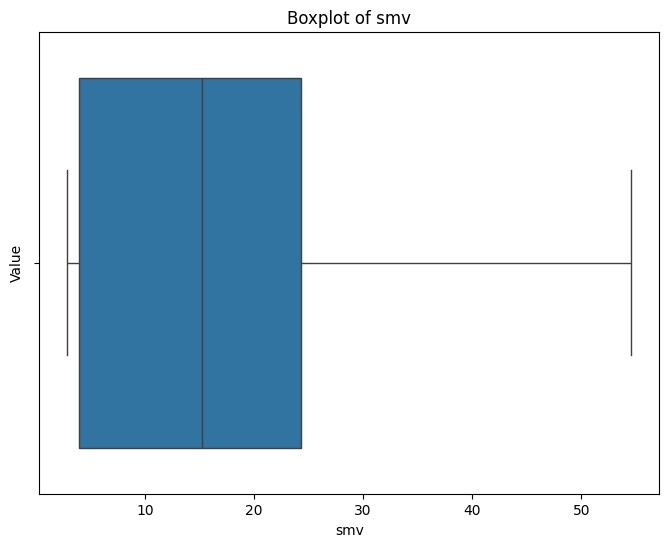

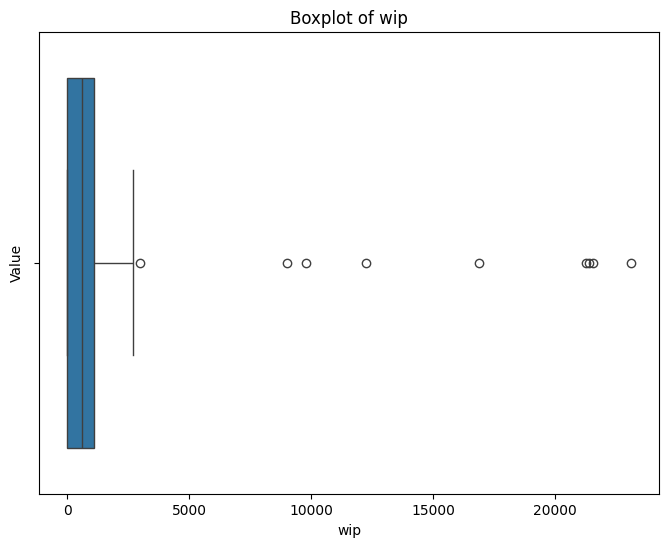

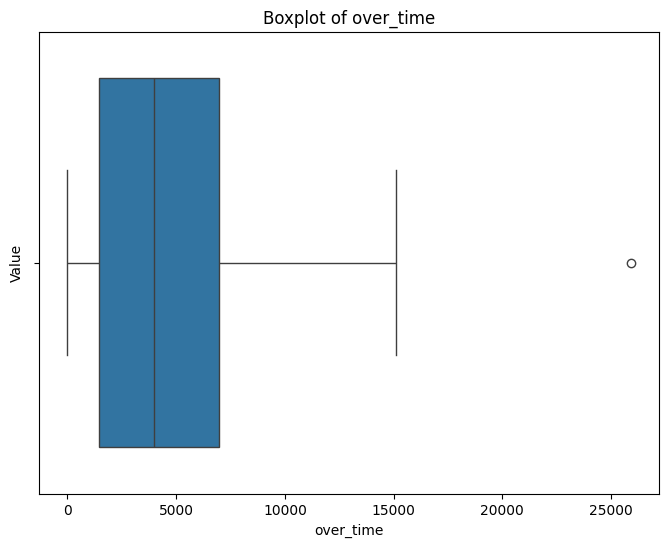

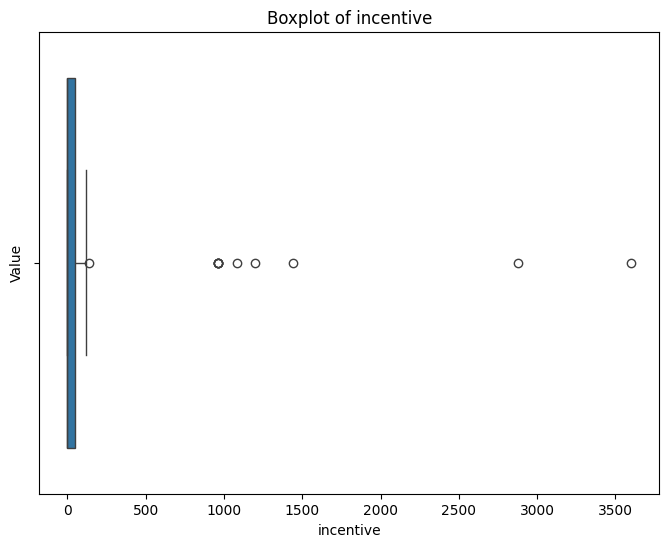

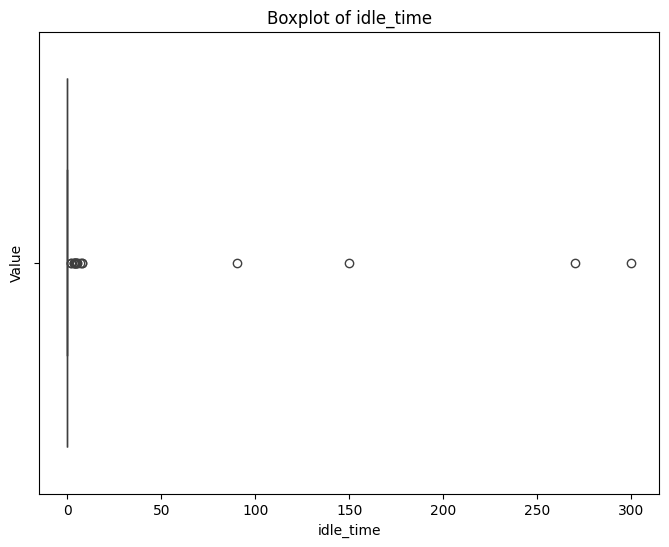

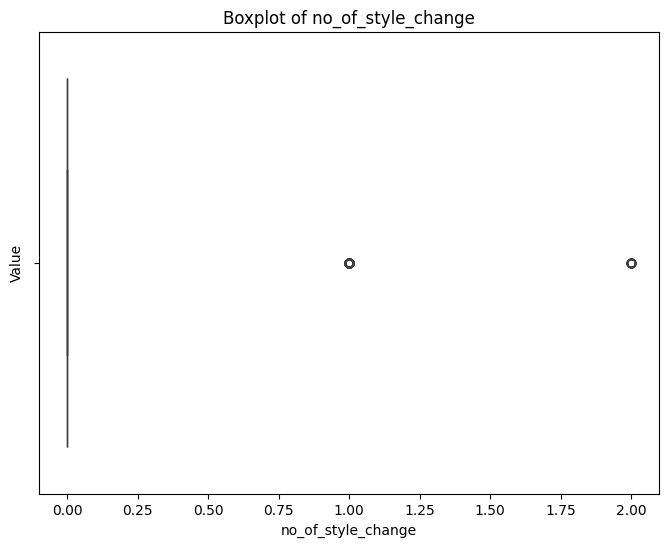

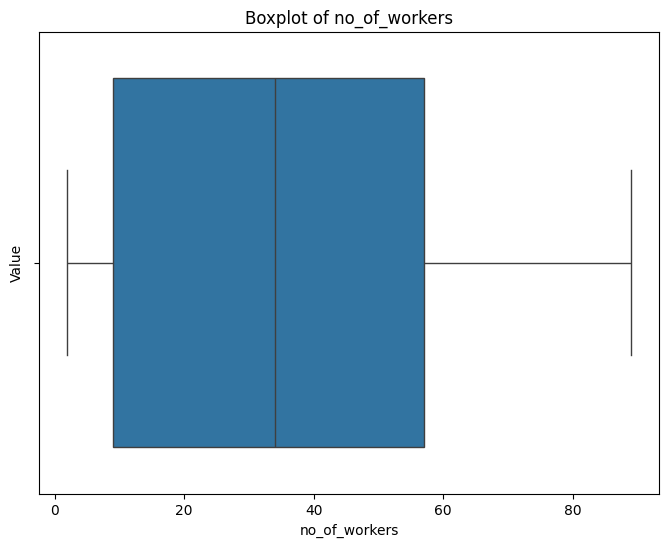

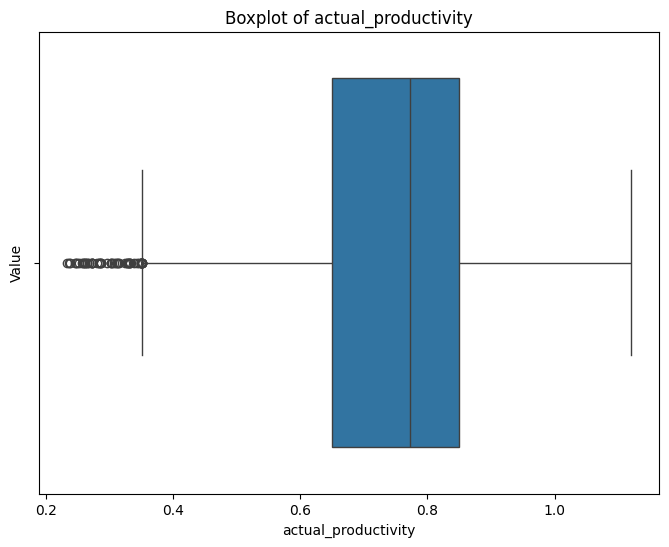

In [6]:
#diagrame de cajas para todas las variables
import seaborn as sns
import matplotlib.pyplot as plt
# Plot boxplots for each variable
for col in df.columns:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)
    plt.ylabel('Value')
    plt.show()


### Modelo de regresión 

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline  # Añadir esta línea


# Definir las columnas numéricas y categóricas
num_cols = ['targeted_productivity', 'smv', 'wip', 'over_time', 'incentive', 'idle_time', 'no_of_workers']
cat_cols = ['quarter', 'department']

# Crear un transformador de columnas para tratar de manera diferente las columnas numéricas y categóricas
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(), cat_cols)])

# Crear un pipeline que primero transforma las columnas y luego aplica la regresión lineal
model = Pipeline(steps=[('preprocessor', preprocessor),
                        ('regressor', LinearRegression())])

# Definir X e y
X = df[num_cols + cat_cols]
y = df['actual_productivity']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ajustar el modelo a los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones en los datos de prueba
y_pred = model.predict(X_test)

# Evaluar el modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Imprimir las métricas de evaluación
print('Mean Squared Error:', mse)
print('R-squared:', r2)

Mean Squared Error: 0.02093194384408783
R-squared: 0.21167610453562513


In [17]:
import statsmodels.api as sm

# Añadir una columna constante a X_train para el modelo de statsmodels
X_train_sm = sm.add_constant(X_train)

# Crear un modelo de regresión lineal usando statsmodels
model_sm = sm.OLS(y_train, X_train_sm)

# Ajustar el modelo a los datos de entrenamiento
results = model_sm.fit()

# Imprimir el resumen del modelo
print(results.summary())

# Prueba de significancia individual
print("Prueba de significancia individual (p-valores):")
print(results.pvalues)

# Prueba de significancia global
print("\nPrueba de significancia global (F-statistic):")
print(results.fvalue)


ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).

In [8]:
import statsmodels.api as sm

# Add a constant column to the X_train dataframe
X_train = sm.add_constant(X_train)

# Create a linear regression model using statsmodels
model_sm = sm.OLS(y_train, X_train)

# Fit the model to the training data
results = model_sm.fit()

# Perform individual significance tests (t-tests) for each variable
individual_pvalues = results.pvalues[1:]  # Exclude the constant column

# Perform global significance test (F-test)
global_pvalue = results.f_pvalue

# Print the results
print("Individual Significance Tests (p-values):")
print(individual_pvalues)
print("\nGlobal Significance Test (F-statistic):")
print("F-statistic:", results.fvalue)
print("p-value:", global_pvalue)


Individual Significance Tests (p-values):
targeted_productivity    3.201495e-44
smv                      3.741567e-09
wip                      2.223103e-01
over_time                8.982705e-01
incentive                8.906273e-02
idle_time                4.226658e-01
no_of_workers            5.936810e-06
dtype: float64

Global Significance Test (F-statistic):
F-statistic: 38.56325803314869
p-value: 9.07822974185873e-48


In [9]:
# Updated feature list without non-significant variables
features = ['targeted_productivity', 'smv', 'no_of_workers']

# Split the data into training and testing sets using the updated feature list
X_train = X_train[features]
X_test = X_test[features]

# Create a new linear regression model
model = LinearRegression()

# Fit the model to the updated training data
model.fit(X_train, y_train)

# Make predictions on the updated testing data
y_pred = model.predict(X_test)

# Evaluate the updated model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics for the updated model
print('Mean Squared Error:', mse)
print('R-squared:', r2)


Mean Squared Error: 0.02210180288652141
R-squared: 0.1676177101340014


In [ ]:
# tipos de X y y
print(type(X))
print(type(y))